In [214]:
# Cleaning and exploring the dataset:
# USA Pollution data
# USA income per county data
# Asthma & COPD data on the state level
# Lung Cancer data on the county level
# USA state & county population data

In [215]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import locale

# Data files
air_pollution_county_data = "data/USA_AQI_2016.csv"
county_income_data = "data/USA_county_income_2016.csv"
asthma_state_data = "data/USA_asthma_2016.csv"
copd_state_data = "data/USA_COPD.csv"
lung_bronchus_county_data = "data/USA_county_lung_bronchus_2016.csv"
uninsured_pop = "data/2016_uninsured_county.csv"
state_total_population = "data/state_total_population.csv"
county_pop = "data/county_population.csv"

# Read in the data
air_pollution_county = pd.read_csv(air_pollution_county_data)
income_county = pd.read_csv(county_income_data)
asthma_state = pd.read_csv(asthma_state_data)
copd_state = pd.read_csv(copd_state_data)
lung_bronchus_county = pd.read_csv(lung_bronchus_county_data)
uninsured_county_population = pd.read_csv(uninsured_pop)
state_data = pd.read_csv(state_total_population)
county_population = pd.read_csv(county_pop)

In [216]:
# Begin cleaning Lung & Bronchus Data
# Rename Columns
lung_bronchus_county = lung_bronchus_county.rename(columns={"USCS_StateCountyMap (14)":"State","Unnamed: 1":"County","Unnamed: 2":"Cancer","Unnamed: 3":"Year","Unnamed: 4":"Sex","Unnamed: 5":"Age_Adjusted_Rate","Unnamed: 6":"Case_Count","Unnamed: 7":"Population"})
lung_bronchus_county

,State,County,Cancer,Year,Sex,Age_Adjusted_Rate,Case_Count,Population,Unnamed: 8,Unnamed: 9,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Area,County,CancerType,Year,Sex,AgeAdjustedRate,CaseCount,Population,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'Alabama','Choctaw County','Lung and Bronchus','2012-2016','Male and Female','48.2','52','66556',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'Alabama','Shelby County','Lung and Bronchus','2012-2016','Male and Female','48.3','526','1030827',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'Alabama','Monroe County','Lung and Bronchus','2012-2016','Male and Female','54.1','86','109986',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'Alabama','Montgomery County','Lung and Bronchus','2012-2016','Male and Female','54.3','678','1137654',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,'Wyoming','Goshen County','Lung and Bronchus','2012-2016','Male and Female','50.0','52','67658',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,'Wyoming','Carbon County','Lung and Bronchus','2012-2016','Male and Female','53.3','48','78872',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,'Wyoming','Sheridan County','Lung and Bronchus','2012-2016','Male and Female','43.0','93','149140',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,'Wyoming','Big Horn County','Lung and Bronchus','2012-2016','Male and Female','43.3','38','59460',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
# Specifiy specific columns that we want to view
lung_bronchus_county_final = lung_bronchus_county[["State","County","Cancer","Year","Sex","Age_Adjusted_Rate","Case_Count","Population"]]
lung_bronchus_county_final

,State,County,Cancer,Year,Sex,Age_Adjusted_Rate,Case_Count,Population
0,Area,County,CancerType,Year,Sex,AgeAdjustedRate,CaseCount,Population
1,'Alabama','Choctaw County','Lung and Bronchus','2012-2016','Male and Female','48.2','52','66556'
2,'Alabama','Shelby County','Lung and Bronchus','2012-2016','Male and Female','48.3','526','1030827'
3,'Alabama','Monroe County','Lung and Bronchus','2012-2016','Male and Female','54.1','86','109986'
4,'Alabama','Montgomery County','Lung and Bronchus','2012-2016','Male and Female','54.3','678','1137654'
...,...,...,...,...,...,...,...,...
3147,'Wyoming','Goshen County','Lung and Bronchus','2012-2016','Male and Female','50.0','52','67658'
3148,'Wyoming','Carbon County','Lung and Bronchus','2012-2016','Male and Female','53.3','48','78872'
3149,'Wyoming','Sheridan County','Lung and Bronchus','2012-2016','Male and Female','43.0','93','149140'
3150,'Wyoming','Big Horn County','Lung and Bronchus','2012-2016','Male and Female','43.3','38','59460'


In [218]:
# Drop the additional header column
lung_bronchus_county_final

lung_bronchus_final = lung_bronchus_county_final.drop([0])
lung_bronchus_final

,State,County,Cancer,Year,Sex,Age_Adjusted_Rate,Case_Count,Population
1,'Alabama','Choctaw County','Lung and Bronchus','2012-2016','Male and Female','48.2','52','66556'
2,'Alabama','Shelby County','Lung and Bronchus','2012-2016','Male and Female','48.3','526','1030827'
3,'Alabama','Monroe County','Lung and Bronchus','2012-2016','Male and Female','54.1','86','109986'
4,'Alabama','Montgomery County','Lung and Bronchus','2012-2016','Male and Female','54.3','678','1137654'
5,'Alabama','Perry County','Lung and Bronchus','2012-2016','Male and Female','52.2','36','49245'
...,...,...,...,...,...,...,...,...
3147,'Wyoming','Goshen County','Lung and Bronchus','2012-2016','Male and Female','50.0','52','67658'
3148,'Wyoming','Carbon County','Lung and Bronchus','2012-2016','Male and Female','53.3','48','78872'
3149,'Wyoming','Sheridan County','Lung and Bronchus','2012-2016','Male and Female','43.0','93','149140'
3150,'Wyoming','Big Horn County','Lung and Bronchus','2012-2016','Male and Female','43.3','38','59460'


In [219]:
# Remove the first ' from each row and column
lung_bronchus_final['State'] = lung_bronchus_final['State'].str[1:]
lung_bronchus_final['County'] = lung_bronchus_final['County'].str[1:]
lung_bronchus_final['Cancer'] = lung_bronchus_final['Cancer'].str[1:]
lung_bronchus_final['Year'] = lung_bronchus_final['Year'].str[1:]
lung_bronchus_final['Sex'] = lung_bronchus_final['Sex'].str[1:]
lung_bronchus_final['Age_Adjusted_Rate'] = lung_bronchus_final['Age_Adjusted_Rate'].str[1:]
lung_bronchus_final['Case_Count'] = lung_bronchus_final['Case_Count'].str[1:]
lung_bronchus_final['Population'] = lung_bronchus_final['Population'].str[1:]
lung_bronchus_final

,State,County,Cancer,Year,Sex,Age_Adjusted_Rate,Case_Count,Population
1,Alabama',Choctaw County',Lung and Bronchus',2012-2016',Male and Female',48.2',52',66556'
2,Alabama',Shelby County',Lung and Bronchus',2012-2016',Male and Female',48.3',526',1030827'
3,Alabama',Monroe County',Lung and Bronchus',2012-2016',Male and Female',54.1',86',109986'
4,Alabama',Montgomery County',Lung and Bronchus',2012-2016',Male and Female',54.3',678',1137654'
5,Alabama',Perry County',Lung and Bronchus',2012-2016',Male and Female',52.2',36',49245'
...,...,...,...,...,...,...,...,...
3147,Wyoming',Goshen County',Lung and Bronchus',2012-2016',Male and Female',50.0',52',67658'
3148,Wyoming',Carbon County',Lung and Bronchus',2012-2016',Male and Female',53.3',48',78872'
3149,Wyoming',Sheridan County',Lung and Bronchus',2012-2016',Male and Female',43.0',93',149140'
3150,Wyoming',Big Horn County',Lung and Bronchus',2012-2016',Male and Female',43.3',38',59460'


In [220]:
# Remove the last ' from each row and column
lung_bronchus_final['State'] = lung_bronchus_final['State'].map(lambda x: str(x)[:-1])
lung_bronchus_final['County'] = lung_bronchus_final['County'].map(lambda x: str(x)[:-1])
lung_bronchus_final['Cancer'] = lung_bronchus_final['Cancer'].map(lambda x: str(x)[:-1])
lung_bronchus_final['Year'] = lung_bronchus_final['Year'].map(lambda x: str(x)[:-1])
lung_bronchus_final['Sex'] = lung_bronchus_final['Sex'].map(lambda x: str(x)[:-1])
lung_bronchus_final['Age_Adjusted_Rate'] = lung_bronchus_final['Age_Adjusted_Rate'].map(lambda x: str(x)[:-1])
lung_bronchus_final['Case_Count'] = lung_bronchus_final['Case_Count'].map(lambda x: str(x)[:-1])
lung_bronchus_final['Population'] = lung_bronchus_final['Population'].map(lambda x: str(x)[:-1])
lung_bronchus_final

,State,County,Cancer,Year,Sex,Age_Adjusted_Rate,Case_Count,Population
1,Alabama,Choctaw County,Lung and Bronchus,2012-2016,Male and Female,48.2,52,66556
2,Alabama,Shelby County,Lung and Bronchus,2012-2016,Male and Female,48.3,526,1030827
3,Alabama,Monroe County,Lung and Bronchus,2012-2016,Male and Female,54.1,86,109986
4,Alabama,Montgomery County,Lung and Bronchus,2012-2016,Male and Female,54.3,678,1137654
5,Alabama,Perry County,Lung and Bronchus,2012-2016,Male and Female,52.2,36,49245
...,...,...,...,...,...,...,...,...
3147,Wyoming,Goshen County,Lung and Bronchus,2012-2016,Male and Female,50.0,52,67658
3148,Wyoming,Carbon County,Lung and Bronchus,2012-2016,Male and Female,53.3,48,78872
3149,Wyoming,Sheridan County,Lung and Bronchus,2012-2016,Male and Female,43.0,93,149140
3150,Wyoming,Big Horn County,Lung and Bronchus,2012-2016,Male and Female,43.3,38,59460


In [221]:
# Look at data types
lung_bronchus_final.dtypes

State                object
County               object
Cancer               object
Year                 object
Sex                  object
Age_Adjusted_Rate    object
Case_Count           object
Population           object
dtype: object

In [222]:
# Drop any row that contains "Data Suppressed" value
clean_lung_data = lung_bronchus_final.replace('Data Suppressed',np.nan).dropna(axis = 0, how = 'any')

In [223]:
# Change the columns that contain values from objects to floats
clean_lung_data["Age_Adjusted_Rate"] = clean_lung_data.Age_Adjusted_Rate.astype(float)
clean_lung_data["Case_Count"] = clean_lung_data.Case_Count.astype(float)
clean_lung_data["Population"] = clean_lung_data.Population.astype(float)

In [224]:
# Check data types to ensure the values are floats
clean_lung_data.dtypes

State                 object
County                object
Cancer                object
Year                  object
Sex                   object
Age_Adjusted_Rate    float64
Case_Count           float64
Population           float64
dtype: object

In [225]:
## Final Lung Data
lung_bronchus_project_data = clean_lung_data[["State","County","Cancer","Case_Count","Population"]]
lung_bronchus_project_data['County'] = lung_bronchus_project_data['County'].map(lambda x: str(x)[:-7])
lung_bronchus_project_data

/opt/anaconda3/envs/PythonDataViz/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,County,Cancer,Case_Count,Population
1,Alabama,Choctaw,Lung and Bronchus,52.0,66556.0
2,Alabama,Shelby,Lung and Bronchus,526.0,1030827.0
3,Alabama,Monroe,Lung and Bronchus,86.0,109986.0
4,Alabama,Montgomery,Lung and Bronchus,678.0,1137654.0
5,Alabama,Perry,Lung and Bronchus,36.0,49245.0
...,...,...,...,...,...
3147,Wyoming,Goshen,Lung and Bronchus,52.0,67658.0
3148,Wyoming,Carbon,Lung and Bronchus,48.0,78872.0
3149,Wyoming,Sheridan,Lung and Bronchus,93.0,149140.0
3150,Wyoming,Big Horn,Lung and Bronchus,38.0,59460.0


In [226]:
# Begin cleaning USA County Income
income_county

,State,County,Household Income,95% CI - Low,95% CI - High,Population,% < 18,% 65 and over,Unnamed: 8
0,Alabama,Autauga,54366.0,50255.0,58477.0,55395.0,25.2,13.8,NaN
1,Alabama,Baldwin,49626.0,45920.0,53332.0,200111.0,22.2,18.7,NaN
2,Alabama,Barbour,34971.0,31997.0,37945.0,26887.0,21.2,16.5,NaN
3,Alabama,Bibb,39546.0,35731.0,43361.0,22506.0,21.0,14.8,NaN
4,Alabama,Blount,45567.0,41180.0,49954.0,57719.0,23.6,17.0,NaN
...,...,...,...,...,...,...,...,...,...
3136,Wyoming,Sweetwater,72604.0,66860.0,78348.0,45010.0,27.0,9.5,NaN
3137,Wyoming,Teton,75348.0,67768.0,82928.0,22930.0,19.1,12.2,NaN
3138,Wyoming,Uinta,56800.0,50495.0,63105.0,20904.0,29.8,11.0,NaN
3139,Wyoming,Washakie,50802.0,45076.0,56528.0,8322.0,23.9,20.1,NaN


In [227]:
# Narrow down columns
begin_clean_income_county = income_county[["State","County","Household Income","Population"]]
begin_clean_income_county

,State,County,Household Income,Population
0,Alabama,Autauga,54366.0,55395.0
1,Alabama,Baldwin,49626.0,200111.0
2,Alabama,Barbour,34971.0,26887.0
3,Alabama,Bibb,39546.0,22506.0
4,Alabama,Blount,45567.0,57719.0
...,...,...,...,...
3136,Wyoming,Sweetwater,72604.0,45010.0
3137,Wyoming,Teton,75348.0,22930.0
3138,Wyoming,Uinta,56800.0,20904.0
3139,Wyoming,Washakie,50802.0,8322.0


In [228]:
# Change population column name
county_income_to_merge = begin_clean_income_county.rename(columns={"Population":"Population - County Income"})
county_income_to_merge

,State,County,Household Income,Population - County Income
0,Alabama,Autauga,54366.0,55395.0
1,Alabama,Baldwin,49626.0,200111.0
2,Alabama,Barbour,34971.0,26887.0
3,Alabama,Bibb,39546.0,22506.0
4,Alabama,Blount,45567.0,57719.0
...,...,...,...,...
3136,Wyoming,Sweetwater,72604.0,45010.0
3137,Wyoming,Teton,75348.0,22930.0
3138,Wyoming,Uinta,56800.0,20904.0
3139,Wyoming,Washakie,50802.0,8322.0


In [229]:
# Merge based on similar State and County
lung_and_income = pd.merge(county_income_to_merge, lung_bronchus_project_data, on=['State', 'County'])
lung_and_income

,State,County,Household Income,Population - County Income,Cancer,Case_Count,Population
0,Alabama,Autauga,54366.0,55395.0,Lung and Bronchus,227.0,274602.0
1,Alabama,Baldwin,49626.0,200111.0,Lung and Bronchus,994.0,994220.0
2,Alabama,Barbour,34971.0,26887.0,Lung and Bronchus,114.0,132909.0
3,Alabama,Bibb,39546.0,22506.0,Lung and Bronchus,105.0,112888.0
4,Alabama,Blount,45567.0,57719.0,Lung and Bronchus,258.0,287916.0
...,...,...,...,...,...,...,...
2794,Wyoming,Sweetwater,72604.0,45010.0,Lung and Bronchus,92.0,224145.0
2795,Wyoming,Teton,75348.0,22930.0,Lung and Bronchus,22.0,113061.0
2796,Wyoming,Uinta,56800.0,20904.0,Lung and Bronchus,33.0,104295.0
2797,Wyoming,Washakie,50802.0,8322.0,Lung and Bronchus,26.0,41620.0


In [230]:
# Organized merged dataframe
project_lung_and_income = lung_and_income[["State","County","Cancer","Case_Count","Household Income"]]
project_lung_and_income

,State,County,Cancer,Case_Count,Household Income
0,Alabama,Autauga,Lung and Bronchus,227.0,54366.0
1,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0
2,Alabama,Barbour,Lung and Bronchus,114.0,34971.0
3,Alabama,Bibb,Lung and Bronchus,105.0,39546.0
4,Alabama,Blount,Lung and Bronchus,258.0,45567.0
...,...,...,...,...,...
2794,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0
2795,Wyoming,Teton,Lung and Bronchus,22.0,75348.0
2796,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0
2797,Wyoming,Washakie,Lung and Bronchus,26.0,50802.0


The correlation between USA County Median Income and Lung Cancer Cases is 0.25.


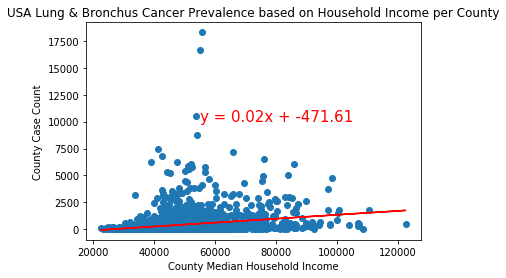

In [231]:
# Loor at relationship between Income and Lung Cancer Cases
x_values = project_lung_and_income['Household Income']
y_values = project_lung_and_income['Case_Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55000,10000),fontsize=15,color="red")
plt.title("USA Lung & Bronchus Cancer Prevalence based on Household Income per County")
plt.ylabel("County Case Count")
plt.xlabel("County Median Household Income")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between USA County Median Income and Lung Cancer Cases is {round(correlation[0],2)}.")

In [232]:
# Begin cleaning County Air Pollution
air_pollution_county

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2016,279,247,32,0,0,0,0,87,51,37,0,0,221,0,58,0
1,Alabama,Clay,2016,116,109,7,0,0,0,0,56,45,30,0,0,0,0,116,0
2,Alabama,Colbert,2016,282,258,23,1,0,0,0,115,50,38,0,0,219,0,63,0
3,Alabama,DeKalb,2016,348,304,43,1,0,0,0,119,54,40,0,0,321,0,27,0
4,Alabama,Elmore,2016,117,107,10,0,0,0,0,77,48,40,0,0,117,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,Wyoming,Sublette,2016,366,297,68,1,0,0,0,102,61,44,0,0,351,0,15,0
1050,Wyoming,Sweetwater,2016,366,303,62,1,0,0,0,111,60,44,0,0,323,5,4,34
1051,Wyoming,Teton,2016,366,331,35,0,0,0,0,99,50,41,0,0,351,0,15,0
1052,Wyoming,Uinta,2016,366,341,25,0,0,0,0,87,49,42,0,0,359,0,0,7


In [233]:
# Not much to clean, so merged lung and income data with air pollution
lung_income_air_pollution = pd.merge(project_lung_and_income, air_pollution_county, on=['State', 'County'])
lung_income_air_pollution

,State,County,Cancer,Case_Count,Household Income,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0,2016,279,247,32,0,...,0,87,51,37,0,0,221,0,58,0
1,Alabama,Clay,Lung and Bronchus,83.0,35940.0,2016,116,109,7,0,...,0,56,45,30,0,0,0,0,116,0
2,Alabama,Colbert,Lung and Bronchus,252.0,43057.0,2016,282,258,23,1,...,0,115,50,38,0,0,219,0,63,0
3,Alabama,DeKalb,Lung and Bronchus,272.0,36241.0,2016,348,304,43,1,...,0,119,54,40,0,0,321,0,27,0
4,Alabama,Elmore,Lung and Bronchus,321.0,54298.0,2016,117,107,10,0,...,0,77,48,40,0,0,117,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Wyoming,Sheridan,Lung and Bronchus,93.0,54716.0,2016,366,333,32,1,...,0,110,50,38,0,0,300,0,34,32
975,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0,2016,366,303,62,1,...,0,111,60,44,0,0,323,5,4,34
976,Wyoming,Teton,Lung and Bronchus,22.0,75348.0,2016,366,331,35,0,...,0,99,50,41,0,0,351,0,15,0
977,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0,2016,366,341,25,0,...,0,87,49,42,0,0,359,0,0,7


In [234]:
# Begin cleaning Asthma Data
asthma_state

,State,Sample Size,Prevalence (percent),Standard Error,95% CI* (percent),||,Prevalence (number),95% CI* (number)
0,U.S. Total**,"476,217",13.6,0.10,(13.4–13.8),||,"34,013,124","(33,498,463–34,527,785)"
1,Alabama,"7,015",14.9,0.60,(13.8–16.1),||,"563,908","(518,048–609,768)"
2,Alaska,"2,906",14.2,1.08,(12.1–16.4),||,"78,995","(67,042–90,948)"
3,Arizona,"10,903",14.6,0.57,(13.5–15.7),||,"771,201","(709,808–832,595)"
4,Arkansas,"5,279",14.3,0.91,(12.6–16.1),||,"327,559","(285,053–370,066)"
5,California,"11,370",12.8,0.39,(12.1–13.6),||,"3,895,034","(3,657,836–4,132,232)"
6,Colorado,"14,908",13.7,0.39,(13.0–14.5),||,"589,829","(556,091–623,567)"
7,Connecticut,"11,000",15.6,0.51,(14.6–16.6),||,"441,072","(411,103–471,040)"
8,Delaware,"4,046",12.8,0.73,(11.3–14.2),||,"95,852","(84,895–106,808)"
9,DC,"3,837",15.2,0.81,(13.6–16.8),||,"85,143","(75,898–94,388)"


In [235]:
# Remove the first row
asthma_state_final = asthma_state.drop([0])
asthma_state_final

,State,Sample Size,Prevalence (percent),Standard Error,95% CI* (percent),||,Prevalence (number),95% CI* (number)
1,Alabama,"7,015",14.9,0.60,(13.8–16.1),||,"563,908","(518,048–609,768)"
2,Alaska,"2,906",14.2,1.08,(12.1–16.4),||,"78,995","(67,042–90,948)"
3,Arizona,"10,903",14.6,0.57,(13.5–15.7),||,"771,201","(709,808–832,595)"
4,Arkansas,"5,279",14.3,0.91,(12.6–16.1),||,"327,559","(285,053–370,066)"
5,California,"11,370",12.8,0.39,(12.1–13.6),||,"3,895,034","(3,657,836–4,132,232)"
6,Colorado,"14,908",13.7,0.39,(13.0–14.5),||,"589,829","(556,091–623,567)"
7,Connecticut,"11,000",15.6,0.51,(14.6–16.6),||,"441,072","(411,103–471,040)"
8,Delaware,"4,046",12.8,0.73,(11.3–14.2),||,"95,852","(84,895–106,808)"
9,DC,"3,837",15.2,0.81,(13.6–16.8),||,"85,143","(75,898–94,388)"
10,Florida,"36,846",11.0,0.34,(10.4–11.7),||,"1,824,452","(1,711,601–1,937,302)"


In [236]:
# Rename columns
asthma_state_final_renamed = asthma_state_final.rename(columns={"Sample Size":"Asthma Sample Size","Prevalence (percent)":"Asthma Prevalence (percent)","Prevalence (number)":"Asthma Prevalence (number)"})
asthma_state_final_renamed

,State,Asthma Sample Size,Asthma Prevalence (percent),Standard Error,95% CI* (percent),||,Asthma Prevalence (number),95% CI* (number)
1,Alabama,"7,015",14.9,0.60,(13.8–16.1),||,"563,908","(518,048–609,768)"
2,Alaska,"2,906",14.2,1.08,(12.1–16.4),||,"78,995","(67,042–90,948)"
3,Arizona,"10,903",14.6,0.57,(13.5–15.7),||,"771,201","(709,808–832,595)"
4,Arkansas,"5,279",14.3,0.91,(12.6–16.1),||,"327,559","(285,053–370,066)"
5,California,"11,370",12.8,0.39,(12.1–13.6),||,"3,895,034","(3,657,836–4,132,232)"
6,Colorado,"14,908",13.7,0.39,(13.0–14.5),||,"589,829","(556,091–623,567)"
7,Connecticut,"11,000",15.6,0.51,(14.6–16.6),||,"441,072","(411,103–471,040)"
8,Delaware,"4,046",12.8,0.73,(11.3–14.2),||,"95,852","(84,895–106,808)"
9,DC,"3,837",15.2,0.81,(13.6–16.8),||,"85,143","(75,898–94,388)"
10,Florida,"36,846",11.0,0.34,(10.4–11.7),||,"1,824,452","(1,711,601–1,937,302)"


In [237]:
# Specify only columns we need
project_asthma_data = asthma_state_final_renamed[["State", "Asthma Sample Size","Asthma Prevalence (percent)","Asthma Prevalence (number)"]]
project_asthma_data

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number)
1,Alabama,"7,015",14.9,"563,908"
2,Alaska,"2,906",14.2,"78,995"
3,Arizona,"10,903",14.6,"771,201"
4,Arkansas,"5,279",14.3,"327,559"
5,California,"11,370",12.8,"3,895,034"
6,Colorado,"14,908",13.7,"589,829"
7,Connecticut,"11,000",15.6,"441,072"
8,Delaware,"4,046",12.8,"95,852"
9,DC,"3,837",15.2,"85,143"
10,Florida,"36,846",11.0,"1,824,452"


In [238]:
# Begin cleaning COPD data
copd_state

,State,% rural residents*,Rank order in % rural residents,No. in U.S. population with COPD†,% (95% CI)§,No. of Medicare hospitalizations¶,"Rate per 1,000 (95% CI)¶",No. of deaths,"Rate per 100,000 (95% CI)**"
0,Alabama,12.8,16.0,"393,000",9.9 (9.0−10.9),"7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1)
1,Alaska,26.1,5.0,"22,000",4.1 (3.3−5.1),380,6.3 (5.6−6.9),193,36.1 (30.7−41.6)
2,Arizona,1.5,38.0,"325,000",5.8 (5.2−6.5),"4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8)
3,Arkansas,19.1,11.0,"219,000",9.1 (8.0−10.5),"4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8)
4,California,0.7,41.0,"1,207,000",4.0 (3.6−4.4),"20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4)
5,Colorado,5.6,26.0,"179,000",4.2 (3.8−4.6),"2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5)
6,Connecticut,0.0,43.0,"143,000",4.6 (4.1−5.1),"3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0)
7,Delaware,0.0,43.0,"51,000",6.3 (5.3−7.5),"1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6)
8,DC,0.0,43.0,"28,000",5.9 (4.9−7.2),445,7.5 (6.8−8.2),134,21.5 (17.8−25.2)
9,Florida,1.7,37.0,"1,117,000",6.0 (5.4−6.6),"32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1)


In [239]:
# Drop any NaN values
clean_copd = copd_state.dropna()
clean_copd

,State,% rural residents*,Rank order in % rural residents,No. in U.S. population with COPD†,% (95% CI)§,No. of Medicare hospitalizations¶,"Rate per 1,000 (95% CI)¶",No. of deaths,"Rate per 100,000 (95% CI)**"
0,Alabama,12.8,16.0,"393,000",9.9 (9.0−10.9),"7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1)
1,Alaska,26.1,5.0,"22,000",4.1 (3.3−5.1),380,6.3 (5.6−6.9),193,36.1 (30.7−41.6)
2,Arizona,1.5,38.0,"325,000",5.8 (5.2−6.5),"4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8)
3,Arkansas,19.1,11.0,"219,000",9.1 (8.0−10.5),"4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8)
4,California,0.7,41.0,"1,207,000",4.0 (3.6−4.4),"20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4)
5,Colorado,5.6,26.0,"179,000",4.2 (3.8−4.6),"2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5)
6,Connecticut,0.0,43.0,"143,000",4.6 (4.1−5.1),"3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0)
7,Delaware,0.0,43.0,"51,000",6.3 (5.3−7.5),"1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6)
8,DC,0.0,43.0,"28,000",5.9 (4.9−7.2),445,7.5 (6.8−8.2),134,21.5 (17.8−25.2)
9,Florida,1.7,37.0,"1,117,000",6.0 (5.4−6.6),"32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1)


In [240]:
# Rename columns
copd_renamed = clean_copd.rename(columns={"No. in U.S. population with COPD†":"COPD State Population","No. of Medicare hospitalizations¶":"COPD Medicare Hospitalizations","No. of deaths":"COPD_Deaths","Rate per 1,000 (95% CI)¶":"COPD Med. Hospitalizations % per 1000","Rate per 100,000 (95% CI)**":"COPD Death Rate % per 100,000"})
copd_renamed

,State,% rural residents*,Rank order in % rural residents,COPD State Population,% (95% CI)§,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000"
0,Alabama,12.8,16.0,"393,000",9.9 (9.0−10.9),"7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1)
1,Alaska,26.1,5.0,"22,000",4.1 (3.3−5.1),380,6.3 (5.6−6.9),193,36.1 (30.7−41.6)
2,Arizona,1.5,38.0,"325,000",5.8 (5.2−6.5),"4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8)
3,Arkansas,19.1,11.0,"219,000",9.1 (8.0−10.5),"4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8)
4,California,0.7,41.0,"1,207,000",4.0 (3.6−4.4),"20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4)
5,Colorado,5.6,26.0,"179,000",4.2 (3.8−4.6),"2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5)
6,Connecticut,0.0,43.0,"143,000",4.6 (4.1−5.1),"3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0)
7,Delaware,0.0,43.0,"51,000",6.3 (5.3−7.5),"1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6)
8,DC,0.0,43.0,"28,000",5.9 (4.9−7.2),445,7.5 (6.8−8.2),134,21.5 (17.8−25.2)
9,Florida,1.7,37.0,"1,117,000",6.0 (5.4−6.6),"32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1)


In [241]:
# Specify columns we need
project_copd_data = copd_renamed[["State","COPD State Population","COPD Medicare Hospitalizations","COPD Med. Hospitalizations % per 1000","COPD_Deaths","COPD Death Rate % per 100,000"]]
project_copd_data

,State,COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000"
0,Alabama,"393,000","7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1)
1,Alaska,"22,000",380,6.3 (5.6−6.9),193,36.1 (30.7−41.6)
2,Arizona,"325,000","4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8)
3,Arkansas,"219,000","4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8)
4,California,"1,207,000","20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4)
5,Colorado,"179,000","2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5)
6,Connecticut,"143,000","3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0)
7,Delaware,"51,000","1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6)
8,DC,"28,000",445,7.5 (6.8−8.2),134,21.5 (17.8−25.2)
9,Florida,"1,117,000","32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1)


In [242]:
# Merge Asthma and COPD on the state level
asthma_copd_state = pd.merge(project_asthma_data, project_copd_data, how="left", on=["State"])
asthma_copd_state

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000"
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1)
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193,36.1 (30.7−41.6)
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8)
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8)
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4)
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5)
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0)
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6)
8,DC,"3,837",15.2,"85,143","28,000",445,7.5 (6.8−8.2),134,21.5 (17.8−25.2)
9,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1)


In [243]:
# Turn County Income into State Income
state_income_mean = (income_county.groupby(["State"]).mean()["Household Income"])
state_income_mean

State
Alabama                 38562.985075
Alaska                  60290.000000
Arizona                 43057.533333
Arkansas                37577.946667
California              56049.465517
Colorado                52401.906250
Connecticut             70415.375000
Delaware                57406.333333
District of Columbia    69992.000000
Florida                 44085.432836
Georgia                 41210.446541
Hawaii                  62417.750000
Idaho                   45771.840909
Illinois                50952.500000
Indiana                 49449.347826
Iowa                    51707.353535
Kansas                  48843.409524
Kentucky                39687.216667
Louisiana               41705.953125
Maine                   45569.875000
Maryland                67269.916667
Massachusetts           65328.642857
Michigan                44945.771084
Minnesota               54521.494253
Mississippi             35659.475610
Missouri                41522.634783
Montana                 44111.94

In [244]:
# Merge average State Income with Asthma and COPD Data
project_asthma_copd_income = pd.merge(asthma_copd_state, state_income_mean, how="left", on=["State"])
project_asthma_copd_income

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1),38562.985075
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193,36.1 (30.7−41.6),60290.000000
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8),43057.533333
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8),37577.946667
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4),56049.465517
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5),52401.906250
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0),70415.375000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6),57406.333333
8,DC,"3,837",15.2,"85,143","28,000",445,7.5 (6.8−8.2),134,21.5 (17.8−25.2),NaN
9,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1),44085.432836


In [245]:
# Display total Asthma, COPD, and state income data
final_project_asthma_copd_income = project_asthma_copd_income.drop(project_asthma_copd_income.index[8])
final_project_asthma_copd_income

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),"3,217",55.2 (53.3−57.1),38562.985075
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193,36.1 (30.7−41.6),60290.000000
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),"3,570",42.4 (41.0−43.8),43057.533333
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),"2,234",61.3 (58.7−63.8),37577.946667
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),"13,092",31.8 (31.3−32.4),56049.465517
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),"2,514",46.6 (44.8−48.5),52401.906250
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),"1,309",28.4 (26.8−30.0),70415.375000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6),57406.333333
9,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),"11,461",37.4 (36.7−38.1),44085.432836
10,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),"4,501",45.7 (44.3−47.1),41210.446541


Text(0.5, 0, 'Household Income')

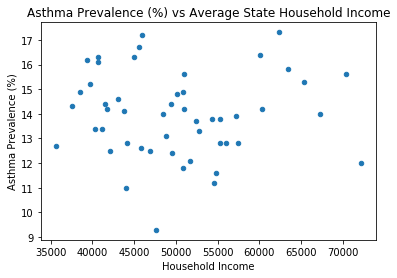

In [246]:
# Look at relationship between income and Asthma prevalence
final_project_asthma_copd_income.plot.scatter(x='Household Income', y='Asthma Prevalence (percent)')
plt.title("Asthma Prevalence (%) vs Average State Household Income")
plt.ylabel("Asthma Prevalence (%)")
plt.xlabel("Household Income")

In [247]:
# Remove , from COPD_Deaths column
final_project_asthma_copd_income['COPD_Deaths'] = final_project_asthma_copd_income['COPD_Deaths'].str.replace(',', '')
final_project_asthma_copd_income

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),3217,55.2 (53.3−57.1),38562.985075
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193,36.1 (30.7−41.6),60290.000000
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),3570,42.4 (41.0−43.8),43057.533333
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),2234,61.3 (58.7−63.8),37577.946667
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),13092,31.8 (31.3−32.4),56049.465517
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),2514,46.6 (44.8−48.5),52401.906250
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),1309,28.4 (26.8−30.0),70415.375000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494,40.9 (37.3−44.6),57406.333333
9,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),11461,37.4 (36.7−38.1),44085.432836
10,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),4501,45.7 (44.3−47.1),41210.446541


In [248]:
# Change COPD_Deaths column to float
final_project_asthma_copd_income["COPD_Deaths"] = final_project_asthma_copd_income.COPD_Deaths.astype(float)
final_project_asthma_copd_income

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),3217.0,55.2 (53.3−57.1),38562.985075
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193.0,36.1 (30.7−41.6),60290.000000
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),3570.0,42.4 (41.0−43.8),43057.533333
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),2234.0,61.3 (58.7−63.8),37577.946667
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),13092.0,31.8 (31.3−32.4),56049.465517
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),2514.0,46.6 (44.8−48.5),52401.906250
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),1309.0,28.4 (26.8−30.0),70415.375000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494.0,40.9 (37.3−44.6),57406.333333
9,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),11461.0,37.4 (36.7−38.1),44085.432836
10,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),4501.0,45.7 (44.3−47.1),41210.446541


Text(0.5, 0, 'Household Income')

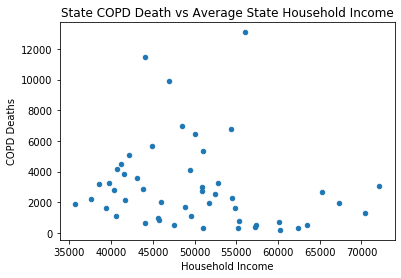

In [249]:
# Look at income and COPD Deaths relationship
final_project_asthma_copd_income.plot.scatter(x='Household Income', y='COPD_Deaths')
plt.title("State COPD Death vs Average State Household Income")
plt.ylabel("COPD Deaths")
plt.xlabel("Household Income")

In [250]:
# Average all county pollution data per state to gather the state pollution data based on the counties we used
air_pollution_state_aqi = (air_pollution_county.groupby(["State"]).mean()["Days with AQI"])
air_pollution_state_good = (air_pollution_county.groupby(["State"]).mean()["Good Days"])
air_pollution_state_mod = (air_pollution_county.groupby(["State"]).mean()["Moderate Days"])
air_pollution_state_unhealthy_sens = (air_pollution_county.groupby(["State"]).mean()["Unhealthy for Sensitive Groups Days"])
air_pollution_state_unhealthy = (air_pollution_county.groupby(["State"]).mean()["Unhealthy Days"])
air_pollution_state_very_unhealthy = (air_pollution_county.groupby(["State"]).mean()["Very Unhealthy Days"])
air_pollution_state_haz = (air_pollution_county.groupby(["State"]).mean()["Hazardous Days"])
air_pollution_state_max_aqi = (air_pollution_county.groupby(["State"]).mean()["Max AQI"])
air_pollution_state_ozone = (air_pollution_county.groupby(["State"]).mean()["Days Ozone"])
air_pollution_state_pm2 = (air_pollution_county.groupby(["State"]).mean()["Days PM2.5"])
air_pollution_state_pm10 = (air_pollution_county.groupby(["State"]).mean()["Days PM10"])

In [251]:
# Begin merging all averaged pollution data into one table (11 of them)
df1_2 = pd.merge(air_pollution_state_aqi, air_pollution_state_good, how="left", on=["State"])

In [252]:
df12_3 = pd.merge(df1_2, air_pollution_state_mod, how="left", on=["State"])

In [253]:
df123_4 = pd.merge(df12_3, air_pollution_state_unhealthy_sens, how="left", on=["State"])

In [254]:
df1234_5 = pd.merge(df123_4, air_pollution_state_unhealthy, how="left", on=["State"])

In [255]:
df12345_6 = pd.merge(df1234_5, air_pollution_state_very_unhealthy, how="left", on=["State"])

In [256]:
df123456_7 = pd.merge(df12345_6, air_pollution_state_haz, how="left", on=["State"])

In [257]:
df1234567_8 = pd.merge(df123456_7, air_pollution_state_max_aqi, how="left", on=["State"])

In [258]:
df12345678_9 = pd.merge(df1234567_8, air_pollution_state_ozone, how="left", on=["State"])

In [259]:
df123456789_10 = pd.merge(df12345678_9, air_pollution_state_pm2, how="left", on=["State"])

In [260]:
# Merge final column and display state pollution data
pollution_state_average = pd.merge(df123456789_10, air_pollution_state_pm10, how="left", on=["State"])
pollution_state_average

,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10
State,,,,,,,,,,,
Alabama,278.222222,219.111111,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333
Alaska,285.285714,236.714286,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714
Arizona,363.692308,237.307692,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000
Arkansas,274.727273,242.000000,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000
California,351.814815,214.481481,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148
Colorado,288.125000,227.406250,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250
Connecticut,316.125000,245.125000,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000
Country Of Mexico,276.000000,61.000000,161.000000,43.000000,11.000000,0.000000,0.000000,194.000000,0.000000,218.000000,58.000000
Delaware,365.333333,276.000000,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000


In [261]:
# Merge State COPD, Asthma, and income data with pollution state data
health_minus_lung_pollution = pd.merge(final_project_asthma_copd_income, pollution_state_average, how="left", on=["State"])
health_minus_lung_pollution

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income,...,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),3217.0,55.2 (53.3−57.1),38562.985075,...,219.111111,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193.0,36.1 (30.7−41.6),60290.000000,...,236.714286,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),3570.0,42.4 (41.0−43.8),43057.533333,...,237.307692,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),2234.0,61.3 (58.7−63.8),37577.946667,...,242.000000,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),13092.0,31.8 (31.3−32.4),56049.465517,...,214.481481,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),2514.0,46.6 (44.8−48.5),52401.906250,...,227.406250,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),1309.0,28.4 (26.8−30.0),70415.375000,...,245.125000,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494.0,40.9 (37.3−44.6),57406.333333,...,276.000000,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000
8,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),11461.0,37.4 (36.7−38.1),44085.432836,...,313.410256,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615
9,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),4501.0,45.7 (44.3−47.1),41210.446541,...,224.781250,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000


In [262]:
# Display previous county lung data
lung_bronchus_project_data.head(70)

,State,County,Cancer,Case_Count,Population
1,Alabama,Choctaw,Lung and Bronchus,52.0,66556.0
2,Alabama,Shelby,Lung and Bronchus,526.0,1030827.0
3,Alabama,Monroe,Lung and Bronchus,86.0,109986.0
4,Alabama,Montgomery,Lung and Bronchus,678.0,1137654.0
5,Alabama,Perry,Lung and Bronchus,36.0,49245.0
...,...,...,...,...,...
66,Alabama,Conecuh,Lung and Bronchus,71.0,63819.0
67,Alabama,Clarke,Lung and Bronchus,109.0,124193.0
68,Alaska,Juneau City and,Lung and Bronchus,62.0,162472.0
69,Alaska,Bethel Cens,Lung and Bronchus,25.0,89363.0


In [263]:
# Take average county lung case count per state to get state lung data
lung_bronchus_state_avg = (lung_bronchus_project_data.groupby(["State"]).mean()["Case_Count"])
lung_bronchus_state_avg

State
Alabama                  295.432836
Alaska                   121.538462
Arizona                 1306.666667
Arkansas                 191.013333
California              1501.803571
Colorado                 244.404255
Connecticut             1677.750000
Delaware                1677.750000
District of Columbia    1596.000000
Florida                 1258.149254
Georgia                  214.477419
Hawaii                  1018.500000
Idaho                    131.941176
Illinois                 462.058824
Indiana                  301.206522
Iowa                     124.153061
Kansas                   102.579710
Kentucky                 205.184874
Louisiana                276.281250
Maine                    435.750000
Maryland                 788.041667
Massachusetts           1790.357143
Michigan                 480.182927
Minnesota                146.333333
Mississippi              161.271605
Missouri                 237.456140
Montana                   88.600000
Nebraska              

In [264]:
# Take sum of population of counties in our dataset to get state population based on the counties used
state_pop = (lung_bronchus_project_data.groupby(["State"]).sum()["Population"])
state_pop

State
Alabama                  24193046.0
Alaska                    3350548.0
Arizona                  33577674.0
Arkansas                 14834645.0
California              193376086.0
Colorado                 26433193.0
Connecticut              17981910.0
Delaware                 17981910.0
District of Columbia      3303613.0
Florida                  99749157.0
Georgia                  50432949.0
Hawaii                    7073080.0
Idaho                     7723323.0
Illinois                 64349112.0
Indiana                  32940934.0
Iowa                     15490325.0
Kansas                   13869525.0
Kentucky                 22040490.0
Louisiana                23235641.0
Maine                     6642998.0
Maryland                 29819892.0
Massachusetts            33746413.0
Michigan                 49541378.0
Minnesota                27101112.0
Mississippi              14923097.0
Missouri                 30275949.0
Montana                   4970080.0
Nebraska              

In [265]:
# Merge state COPD, asthma, and income data with state average lung cancer case count
total_state_avg_health = pd.merge(health_minus_lung_pollution, lung_bronchus_state_avg, how="left", on=["State"])
total_state_avg_health

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income,...,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Case_Count
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),3217.0,55.2 (53.3−57.1),38562.985075,...,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193.0,36.1 (30.7−41.6),60290.000000,...,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),3570.0,42.4 (41.0−43.8),43057.533333,...,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),2234.0,61.3 (58.7−63.8),37577.946667,...,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),13092.0,31.8 (31.3−32.4),56049.465517,...,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),2514.0,46.6 (44.8−48.5),52401.906250,...,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),1309.0,28.4 (26.8−30.0),70415.375000,...,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494.0,40.9 (37.3−44.6),57406.333333,...,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000
8,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),11461.0,37.4 (36.7−38.1),44085.432836,...,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254
9,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),4501.0,45.7 (44.3−47.1),41210.446541,...,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419


In [266]:
# Rename columns
total_state_avg_health = total_state_avg_health.rename(columns={"Case_Count":"Lung_Bronchus_Case_Count"})
total_state_avg_health

,State,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence (number),COPD State Population,COPD Medicare Hospitalizations,COPD Med. Hospitalizations % per 1000,COPD_Deaths,"COPD Death Rate % per 100,000",Household Income,...,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),3217.0,55.2 (53.3−57.1),38562.985075,...,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193.0,36.1 (30.7−41.6),60290.000000,...,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),3570.0,42.4 (41.0−43.8),43057.533333,...,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),2234.0,61.3 (58.7−63.8),37577.946667,...,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),13092.0,31.8 (31.3−32.4),56049.465517,...,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),2514.0,46.6 (44.8−48.5),52401.906250,...,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),1309.0,28.4 (26.8−30.0),70415.375000,...,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494.0,40.9 (37.3−44.6),57406.333333,...,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000
8,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),11461.0,37.4 (36.7−38.1),44085.432836,...,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254
9,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),4501.0,45.7 (44.3−47.1),41210.446541,...,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419


In [267]:
# Export county and state dataframes to csv files
#project_lung_and_income.to_csv(r'data\Lung_Cancer_and_Income.csv')
#lung_income_air_pollution.to_csv(r'data\Lung_Cancer_Air_Pollution_Income.csv')
#total_state_avg_health.to_csv(r'data\Total_State_Average_Health_Data.csv')

In [268]:
# Look at total_state_avg_health datatypes
total_state_avg_health.dtypes

State                                     object
Asthma Sample Size                        object
Asthma Prevalence (percent)              float64
Asthma Prevalence (number)                object
COPD State Population                     object
COPD Medicare Hospitalizations            object
COPD Med. Hospitalizations % per 1000     object
COPD_Deaths                              float64
COPD Death Rate % per 100,000             object
Household Income                         float64
Days with AQI                            float64
Good Days                                float64
Moderate Days                            float64
Unhealthy for Sensitive Groups Days      float64
Unhealthy Days                           float64
Very Unhealthy Days                      float64
Hazardous Days                           float64
Max AQI                                  float64
Days Ozone                               float64
Days PM2.5                               float64
Days PM10           

In [269]:
# Rename total_state_avg_health columns
total_state_avg_health_new = total_state_avg_health.rename(columns={"Asthma Sample Size":"Asthma_Sample_Size","Asthma Prevalence (number)":"Asthma_Prevalence_number","COPD State Population":"COPD_State_Population","COPD Medicare Hospitalizations":"COPD_Medicare_Hospitalizations","COPD Med. Hospitalizations % per 1000":"COPD_Med_Hospitalizations_percent_per_1000","COPD Death Rate % per 100,000":"COPD_Death_Rate_percent_per_100000"})
total_state_avg_health_new

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count
0,Alabama,"7,015",14.9,"563,908","393,000","7,691",14.3 (14.0−14.6),3217.0,55.2 (53.3−57.1),38562.985075,...,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836
1,Alaska,"2,906",14.2,"78,995","22,000",380,6.3 (5.6−6.9),193.0,36.1 (30.7−41.6),60290.000000,...,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462
2,Arizona,"10,903",14.6,"771,201","325,000","4,711",8.3 (8.1−8.5),3570.0,42.4 (41.0−43.8),43057.533333,...,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667
3,Arkansas,"5,279",14.3,"327,559","219,000","4,806",13.3 (12.9−13.7),2234.0,61.3 (58.7−63.8),37577.946667,...,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333
4,California,"11,370",12.8,"3,895,034","1,207,000","20,289",7.9 (7.8−8.1),13092.0,31.8 (31.3−32.4),56049.465517,...,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571
5,Colorado,"14,908",13.7,"589,829","179,000","2,376",6.4 (6.1−6.6),2514.0,46.6 (44.8−48.5),52401.906250,...,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255
6,Connecticut,"11,000",15.6,"441,072","143,000","3,798",9.7 (9.4−10.0),1309.0,28.4 (26.8−30.0),70415.375000,...,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000
7,Delaware,"4,046",12.8,"95,852","51,000","1,137",8.6 (8.1−9.1),494.0,40.9 (37.3−44.6),57406.333333,...,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000
8,Florida,"36,846",11.0,"1,824,452","1,117,000","32,274",15.9 (15.7−16.1),11461.0,37.4 (36.7−38.1),44085.432836,...,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254
9,Georgia,"5,361",13.4,"1,046,849","532,000",9.425,11.9 (11.7−12.2),4501.0,45.7 (44.3−47.1),41210.446541,...,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419


In [270]:
# Look at total_state_avg_health_new names and datatypes
total_state_avg_health_new.dtypes

State                                          object
Asthma_Sample_Size                             object
Asthma Prevalence (percent)                   float64
Asthma_Prevalence_number                       object
COPD_State_Population                          object
COPD_Medicare_Hospitalizations                 object
COPD_Med_Hospitalizations_percent_per_1000     object
COPD_Deaths                                   float64
COPD_Death_Rate_percent_per_100000             object
Household Income                              float64
Days with AQI                                 float64
Good Days                                     float64
Moderate Days                                 float64
Unhealthy for Sensitive Groups Days           float64
Unhealthy Days                                float64
Very Unhealthy Days                           float64
Hazardous Days                                float64
Max AQI                                       float64
Days Ozone                  

In [271]:
# Remove any commas from numbers in dataframe
total_state_avg_health_new['Asthma_Sample_Size'] = total_state_avg_health_new['Asthma_Sample_Size'].str.replace(',', '')
total_state_avg_health_new['Asthma_Prevalence_number'] = total_state_avg_health_new['Asthma_Prevalence_number'].str.replace(',', '')
total_state_avg_health_new['COPD_State_Population'] = total_state_avg_health_new['COPD_State_Population'].str.replace(',', '')
total_state_avg_health_new['COPD_Medicare_Hospitalizations'] = total_state_avg_health_new['COPD_Medicare_Hospitalizations'].str.replace(',', '')
total_state_avg_health_new['Asthma_Sample_Size'] = total_state_avg_health_new['Asthma_Sample_Size'].str.replace(',', '')

In [272]:
# Convert numbers to float
total_state_avg_health_new["Asthma_Sample_Size"] = total_state_avg_health_new.Asthma_Sample_Size.astype(float)
total_state_avg_health_new["Asthma_Prevalence_number"] = total_state_avg_health_new.Asthma_Prevalence_number.astype(float)
total_state_avg_health_new["COPD_State_Population"] = total_state_avg_health_new.COPD_State_Population.astype(float)
total_state_avg_health_new["COPD_Medicare_Hospitalizations"] = total_state_avg_health_new.COPD_Medicare_Hospitalizations.astype(float)
total_state_avg_health_new["Asthma_Sample_Size"] = total_state_avg_health_new.Asthma_Sample_Size.astype(float)

In [273]:
# Check datatypes to ensure they were converted to float
total_state_avg_health_new.dtypes

State                                          object
Asthma_Sample_Size                            float64
Asthma Prevalence (percent)                   float64
Asthma_Prevalence_number                      float64
COPD_State_Population                         float64
COPD_Medicare_Hospitalizations                float64
COPD_Med_Hospitalizations_percent_per_1000     object
COPD_Deaths                                   float64
COPD_Death_Rate_percent_per_100000             object
Household Income                              float64
Days with AQI                                 float64
Good Days                                     float64
Moderate Days                                 float64
Unhealthy for Sensitive Groups Days           float64
Unhealthy Days                                float64
Very Unhealthy Days                           float64
Hazardous Days                                float64
Max AQI                                       float64
Days Ozone                  

In [274]:
# Display dataframe
total_state_avg_health_new

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count
0,Alabama,7015.0,14.9,563908.0,393000.0,7691.000,14.3 (14.0−14.6),3217.0,55.2 (53.3−57.1),38562.985075,...,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836
1,Alaska,2906.0,14.2,78995.0,22000.0,380.000,6.3 (5.6−6.9),193.0,36.1 (30.7−41.6),60290.000000,...,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462
2,Arizona,10903.0,14.6,771201.0,325000.0,4711.000,8.3 (8.1−8.5),3570.0,42.4 (41.0−43.8),43057.533333,...,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667
3,Arkansas,5279.0,14.3,327559.0,219000.0,4806.000,13.3 (12.9−13.7),2234.0,61.3 (58.7−63.8),37577.946667,...,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333
4,California,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9 (7.8−8.1),13092.0,31.8 (31.3−32.4),56049.465517,...,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571
5,Colorado,14908.0,13.7,589829.0,179000.0,2376.000,6.4 (6.1−6.6),2514.0,46.6 (44.8−48.5),52401.906250,...,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255
6,Connecticut,11000.0,15.6,441072.0,143000.0,3798.000,9.7 (9.4−10.0),1309.0,28.4 (26.8−30.0),70415.375000,...,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000
7,Delaware,4046.0,12.8,95852.0,51000.0,1137.000,8.6 (8.1−9.1),494.0,40.9 (37.3−44.6),57406.333333,...,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000
8,Florida,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9 (15.7−16.1),11461.0,37.4 (36.7−38.1),44085.432836,...,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254
9,Georgia,5361.0,13.4,1046849.0,532000.0,9.425,11.9 (11.7−12.2),4501.0,45.7 (44.3−47.1),41210.446541,...,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419


In [275]:
# Get rid of the parentheses in the COPD columns as well as the data within the parentheses
total_state_avg_health_new["COPD_Med_Hospitalizations_percent_per_1000"] = total_state_avg_health_new["COPD_Med_Hospitalizations_percent_per_1000"].str.replace(r"\(.*?\)", "")
total_state_avg_health_new["COPD_Death_Rate_percent_per_100000"] = total_state_avg_health_new["COPD_Death_Rate_percent_per_100000"].str.replace(r"\(.*?\)", "")
total_state_avg_health_new

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count
0,Alabama,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,55.2,38562.985075,...,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836
1,Alaska,2906.0,14.2,78995.0,22000.0,380.000,6.3,193.0,36.1,60290.000000,...,40.000000,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462
2,Arizona,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,42.4,43057.533333,...,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667
3,Arkansas,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,61.3,37577.946667,...,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333
4,California,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,31.8,56049.465517,...,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571
5,Colorado,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,46.6,52401.906250,...,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255
6,Connecticut,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,28.4,70415.375000,...,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000
7,Delaware,4046.0,12.8,95852.0,51000.0,1137.000,8.6,494.0,40.9,57406.333333,...,84.333333,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000
8,Florida,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,37.4,44085.432836,...,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254
9,Georgia,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,45.7,41210.446541,...,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419


In [276]:
# Convert COPD columns to float
total_state_avg_health_new["COPD_Med_Hospitalizations_percent_per_1000"] = total_state_avg_health_new.COPD_Med_Hospitalizations_percent_per_1000.astype(float)
total_state_avg_health_new["COPD_Death_Rate_percent_per_100000"] = total_state_avg_health_new.COPD_Death_Rate_percent_per_100000.astype(float)

In [277]:
# Ensure they were converted
total_state_avg_health_new.dtypes

State                                          object
Asthma_Sample_Size                            float64
Asthma Prevalence (percent)                   float64
Asthma_Prevalence_number                      float64
COPD_State_Population                         float64
COPD_Medicare_Hospitalizations                float64
COPD_Med_Hospitalizations_percent_per_1000    float64
COPD_Deaths                                   float64
COPD_Death_Rate_percent_per_100000            float64
Household Income                              float64
Days with AQI                                 float64
Good Days                                     float64
Moderate Days                                 float64
Unhealthy for Sensitive Groups Days           float64
Unhealthy Days                                float64
Very Unhealthy Days                           float64
Hazardous Days                                float64
Max AQI                                       float64
Days Ozone                  

The correlation between USA State Income and State Asthma Cases is -0.01.


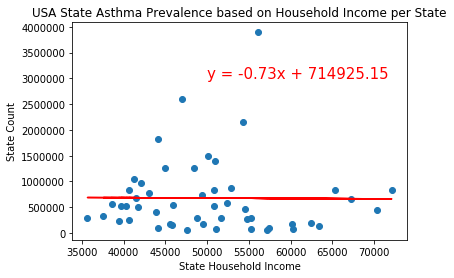

In [278]:
# Look at state income vs asthma prevalency 
x_values = total_state_avg_health_new['Household Income']
y_values = total_state_avg_health_new['Asthma_Prevalence_number']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,3000000),fontsize=15,color="red")
plt.title("USA State Asthma Prevalence based on Household Income per State")
plt.ylabel("State Count")
plt.xlabel("State Household Income")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between USA State Income and State Asthma Cases is {round(correlation[0],2)}.")

The correlation between USA State Income and State COPD Deaths is -0.17.


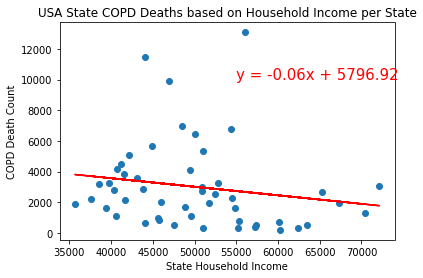

In [279]:
# Look at state income vs COPD Deaths 
x_values = total_state_avg_health_new['Household Income']
y_values = total_state_avg_health_new['COPD_Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55000,10000),fontsize=15,color="red")
plt.title("USA State COPD Deaths based on Household Income per State")
plt.ylabel("COPD Death Count")
plt.xlabel("State Household Income")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between USA State Income and State COPD Deaths is {round(correlation[0],2)}.")

The correlation between USA State Asthma Prevalence (%) and Days PM2.5 is 0.07.


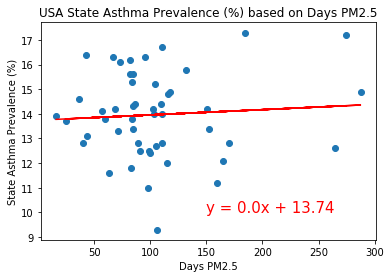

In [280]:
# Look at PM2.5 vs asthma prevalency 
x_values = total_state_avg_health_new['Days PM2.5']
y_values = total_state_avg_health_new['Asthma Prevalence (percent)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,10),fontsize=15,color="red")
plt.title("USA State Asthma Prevalence (%) based on Days PM2.5")
plt.ylabel("State Asthma Prevalence (%)")
plt.xlabel("Days PM2.5")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between USA State Asthma Prevalence (%) and Days PM2.5 is {round(correlation[0],2)}.")

In [281]:
# Export dataframe to csv file
#total_state_avg_health_new.to_csv(r'data\Total_State_Average_Health_Data_new.csv')

In [282]:
# Look at Lung Cancer data based on columns we'd like to use
lung_and_income_population = lung_and_income[["State","County","Cancer","Case_Count","Household Income","Population"]]
lung_and_income_population                                              

,State,County,Cancer,Case_Count,Household Income,Population
0,Alabama,Autauga,Lung and Bronchus,227.0,54366.0,274602.0
1,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0,994220.0
2,Alabama,Barbour,Lung and Bronchus,114.0,34971.0,132909.0
3,Alabama,Bibb,Lung and Bronchus,105.0,39546.0,112888.0
4,Alabama,Blount,Lung and Bronchus,258.0,45567.0,287916.0
...,...,...,...,...,...,...
2794,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0,224145.0
2795,Wyoming,Teton,Lung and Bronchus,22.0,75348.0,113061.0
2796,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0,104295.0
2797,Wyoming,Washakie,Lung and Bronchus,26.0,50802.0,41620.0


In [283]:
# Merge Lung Cancer county data with air pollution county data
new_lung_income_air_pollution = pd.merge(lung_and_income_population, air_pollution_county, on=['State', 'County'])
new_lung_income_air_pollution

,State,County,Cancer,Case_Count,Household Income,Population,Year,Days with AQI,Good Days,Moderate Days,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0,994220.0,2016,279,247,32,...,0,87,51,37,0,0,221,0,58,0
1,Alabama,Clay,Lung and Bronchus,83.0,35940.0,67104.0,2016,116,109,7,...,0,56,45,30,0,0,0,0,116,0
2,Alabama,Colbert,Lung and Bronchus,252.0,43057.0,272243.0,2016,282,258,23,...,0,115,50,38,0,0,219,0,63,0
3,Alabama,DeKalb,Lung and Bronchus,272.0,36241.0,355297.0,2016,348,304,43,...,0,119,54,40,0,0,321,0,27,0
4,Alabama,Elmore,Lung and Bronchus,321.0,54298.0,403489.0,2016,117,107,10,...,0,77,48,40,0,0,117,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Wyoming,Sheridan,Lung and Bronchus,93.0,54716.0,149140.0,2016,366,333,32,...,0,110,50,38,0,0,300,0,34,32
975,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0,224145.0,2016,366,303,62,...,0,111,60,44,0,0,323,5,4,34
976,Wyoming,Teton,Lung and Bronchus,22.0,75348.0,113061.0,2016,366,331,35,...,0,99,50,41,0,0,351,0,15,0
977,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0,104295.0,2016,366,341,25,...,0,87,49,42,0,0,359,0,0,7


In [284]:
# Take a sum of the populations of each county per state
population_sum = (new_lung_income_air_pollution.groupby(["State"]).sum()["Case_Count"])
population_sum

State
Alabama           11328.0
Arizona           19491.0
Arkansas           3845.0
California        83768.0
Colorado          10742.0
Connecticut       13422.0
Florida           75500.0
Georgia           17631.0
Hawaii             4074.0
Idaho              3707.0
Illinois          34807.0
Indiana           20589.0
Iowa               6172.0
Kansas             3654.0
Kentucky          12192.0
Louisiana         12386.0
Maine              5969.0
Maryland          12121.0
Massachusetts     25027.0
Michigan          28138.0
Minnesota          7106.0
Mississippi        4829.0
Missouri           9606.0
Montana            2668.0
Nebraska           3572.0
Nevada             8291.0
New Hampshire      4489.0
New Jersey        25552.0
New Mexico         3963.0
New York          57201.0
North Carolina    22092.0
North Dakota        963.0
Ohio              38677.0
Oklahoma          10238.0
Oregon            11440.0
Pennsylvania      46769.0
Rhode Island       4083.0
South Carolina    14196.0
South 

In [285]:
# Merge state population data with the total state dataframe
new_for_project_total_state_avg_health = pd.merge(total_state_avg_health_new, population_sum, how="left", on=["State"])
new_for_project_total_state_avg_health

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Case_Count
0,Alabama,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,55.2,38562.985075,...,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0
1,Alaska,2906.0,14.2,78995.0,22000.0,380.000,6.3,193.0,36.1,60290.000000,...,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462,NaN
2,Arizona,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,42.4,43057.533333,...,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0
3,Arkansas,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,61.3,37577.946667,...,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0
4,California,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,31.8,56049.465517,...,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0
5,Colorado,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,46.6,52401.906250,...,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0
6,Connecticut,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,28.4,70415.375000,...,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0
7,Delaware,4046.0,12.8,95852.0,51000.0,1137.000,8.6,494.0,40.9,57406.333333,...,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000,NaN
8,Florida,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,37.4,44085.432836,...,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0
9,Georgia,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,45.7,41210.446541,...,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0


In [286]:
# Rename columns and display
new_for_project_total_state_avg_health = new_for_project_total_state_avg_health.rename(columns={"Case_Count":"Population_State_Lung"})
new_for_project_total_state_avg_health

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Population_State_Lung
0,Alabama,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,55.2,38562.985075,...,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0
1,Alaska,2906.0,14.2,78995.0,22000.0,380.000,6.3,193.0,36.1,60290.000000,...,5.285714,3.285714,0.000000,0.000000,88.428571,105.714286,150.428571,28.285714,121.538462,NaN
2,Arizona,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,42.4,43057.533333,...,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0
3,Arkansas,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,61.3,37577.946667,...,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0
4,California,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,31.8,56049.465517,...,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0
5,Colorado,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,46.6,52401.906250,...,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0
6,Connecticut,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,28.4,70415.375000,...,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0
7,Delaware,4046.0,12.8,95852.0,51000.0,1137.000,8.6,494.0,40.9,57406.333333,...,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000,NaN
8,Florida,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,37.4,44085.432836,...,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0
9,Georgia,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,45.7,41210.446541,...,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0


In [287]:
# Remove Alaska
new_for_project_total_state_avg_health = new_for_project_total_state_avg_health.drop(project_asthma_copd_income.index[1])
new_for_project_total_state_avg_health

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Population_State_Lung
0,Alabama,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,55.2,38562.985075,...,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0
2,Arizona,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,42.4,43057.533333,...,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0
3,Arkansas,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,61.3,37577.946667,...,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0
4,California,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,31.8,56049.465517,...,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0
5,Colorado,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,46.6,52401.906250,...,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0
6,Connecticut,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,28.4,70415.375000,...,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0
7,Delaware,4046.0,12.8,95852.0,51000.0,1137.000,8.6,494.0,40.9,57406.333333,...,4.666667,0.333333,0.000000,0.000000,139.666667,271.333333,89.000000,0.000000,1677.750000,NaN
8,Florida,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,37.4,44085.432836,...,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0
9,Georgia,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,45.7,41210.446541,...,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0
10,Hawaii,8069.0,17.3,195278.0,48000.0,663.000,6.2,303.0,15.8,62417.750000,...,32.250000,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000,1018.500000,4074.0


In [288]:
# Remove Delaware
final_new_for_project_total_state_avg_health = new_for_project_total_state_avg_health.drop(project_asthma_copd_income.index[7])
final_new_for_project_total_state_avg_health

,State,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,Household Income,...,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Population_State_Lung
0,Alabama,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,55.2,38562.985075,...,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0
2,Arizona,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,42.4,43057.533333,...,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0
3,Arkansas,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,61.3,37577.946667,...,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0
4,California,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,31.8,56049.465517,...,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0
5,Colorado,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,46.6,52401.906250,...,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0
6,Connecticut,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,28.4,70415.375000,...,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0
8,Florida,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,37.4,44085.432836,...,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0
9,Georgia,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,45.7,41210.446541,...,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0
10,Hawaii,8069.0,17.3,195278.0,48000.0,663.000,6.2,303.0,15.8,62417.750000,...,32.250000,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000,1018.500000,4074.0
11,Idaho,5251.0,12.6,157454.0,59000.0,942.000,6.3,817.0,44.8,45771.840909,...,3.190476,0.285714,0.000000,0.000000,104.809524,31.380952,264.666667,6.000000,131.941176,3707.0


In [289]:
# Export data to csv
#final_new_for_project_total_state_avg_health.to_csv(r'data\Final_Total_State_Average_Health_Data.csv')

In [290]:
# View uninsured county population DF
uninsured_county_population

,State,County,Percent Adult Smokers,Percent Uninsured
0,Alabama,Autauga,19.0,13.0
1,Alabama,Baldwin,19.0,17.0
2,Alabama,Barbour,21.0,17.0
3,Alabama,Bibb,21.0,15.0
4,Alabama,Blount,19.0,18.0
...,...,...,...,...
3136,Wyoming,Sweetwater,19.0,14.0
3137,Wyoming,Teton,15.0,20.0
3138,Wyoming,Uinta,18.0,15.0
3139,Wyoming,Washakie,16.0,19.0


In [291]:
# Merge uninsured data with lung cancer county data
updated_lung_pollution_income = pd.merge(lung_income_air_pollution, uninsured_county_population, on=['State', 'County'])
updated_lung_pollution_income

,State,County,Cancer,Case_Count,Household Income,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Percent Adult Smokers,Percent Uninsured
0,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0,2016,279,247,32,0,...,51,37,0,0,221,0,58,0,19.0,17.0
1,Alabama,Clay,Lung and Bronchus,83.0,35940.0,2016,116,109,7,0,...,45,30,0,0,0,0,116,0,20.0,19.0
2,Alabama,Colbert,Lung and Bronchus,252.0,43057.0,2016,282,258,23,1,...,50,38,0,0,219,0,63,0,19.0,14.0
3,Alabama,DeKalb,Lung and Bronchus,272.0,36241.0,2016,348,304,43,1,...,54,40,0,0,321,0,27,0,19.0,23.0
4,Alabama,Elmore,Lung and Bronchus,321.0,54298.0,2016,117,107,10,0,...,48,40,0,0,117,0,0,0,19.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Wyoming,Sheridan,Lung and Bronchus,93.0,54716.0,2016,366,333,32,1,...,50,38,0,0,300,0,34,32,16.0,15.0
975,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0,2016,366,303,62,1,...,60,44,0,0,323,5,4,34,19.0,14.0
976,Wyoming,Teton,Lung and Bronchus,22.0,75348.0,2016,366,331,35,0,...,50,41,0,0,351,0,15,0,15.0,20.0
977,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0,2016,366,341,25,0,...,49,42,0,0,359,0,0,7,18.0,15.0


In [292]:
# Export data to csv
#updated_lung_pollution_income.to_csv(r'data\updated_lung.csv')

In [293]:
# Take average of adult smokers and the average county uninsured population for state data
avg_state_smokers = (updated_lung_pollution_income.groupby(["State"]).mean()["Percent Adult Smokers"])
avg_state_uninsured = (updated_lung_pollution_income.groupby(["State"]).mean()["Percent Uninsured"])

In [294]:
# Add smoker data to state health data
smokers_final = pd.merge(avg_state_smokers, final_new_for_project_total_state_avg_health, how="left", on=["State"])
smokers_final

,State,Percent Adult Smokers,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,COPD_Death_Rate_percent_per_100000,...,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Population_State_Lung
0,Alabama,19.833333,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,55.2,...,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0
1,Arizona,17.769231,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,42.4,...,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0
2,Arkansas,23.090909,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,61.3,...,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0
3,California,13.226415,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,31.8,...,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0
4,Colorado,14.714286,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,46.6,...,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0
5,Connecticut,13.750000,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,28.4,...,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0
6,Florida,17.102564,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,37.4,...,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0
7,Georgia,17.187500,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,45.7,...,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0
8,Hawaii,14.250000,8069.0,17.3,195278.0,48000.0,663.000,6.2,303.0,15.8,...,32.250000,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000,1018.500000,4074.0
9,Idaho,16.611111,5251.0,12.6,157454.0,59000.0,942.000,6.3,817.0,44.8,...,3.190476,0.285714,0.000000,0.000000,104.809524,31.380952,264.666667,6.000000,131.941176,3707.0


In [295]:
# Add uninsured data to smokers and total state merged data
smokers_uninsured_final = pd.merge(avg_state_uninsured, smokers_final, how="left", on=["State"])
smokers_uninsured_final

,State,Percent Uninsured,Percent Adult Smokers,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,...,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Population_State_Lung
0,Alabama,16.055556,19.833333,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,...,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0
1,Arizona,21.769231,17.769231,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,...,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0
2,Arkansas,19.181818,23.090909,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,...,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0
3,California,18.358491,13.226415,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,...,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0
4,Colorado,17.928571,14.714286,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,...,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0
5,Connecticut,10.000000,13.750000,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,...,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0
6,Florida,22.358974,17.102564,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,...,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0
7,Georgia,20.968750,17.187500,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,...,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0
8,Hawaii,9.000000,14.250000,8069.0,17.3,195278.0,48000.0,663.000,6.2,303.0,...,32.250000,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000,1018.500000,4074.0
9,Idaho,19.888889,16.611111,5251.0,12.6,157454.0,59000.0,942.000,6.3,817.0,...,3.190476,0.285714,0.000000,0.000000,104.809524,31.380952,264.666667,6.000000,131.941176,3707.0


In [296]:
# Export to CSV
#smokers_uninsured_final.to_csv(r'data\new_US.csv')

In [297]:
# Begin cleaning State Population data
state_data

,State,Total Population
0,.Alabama,"4,863,300"
1,.Arizona,"6,931,071"
2,.Arkansas,"2,988,248"
3,.California,"39,250,017"
4,.Colorado,"5,540,545"
5,.Connecticut,"3,576,452"
6,.Florida,"20,612,439"
7,.Georgia,"10,310,371"
8,.Hawaii,"1,428,557"
9,.Idaho,"1,683,140"


In [298]:
# Remove unnecessary period from the beginning of each state name
state_data['State'] = state_data['State'].str[1:]
state_data

,State,Total Population
0,Alabama,"4,863,300"
1,Arizona,"6,931,071"
2,Arkansas,"2,988,248"
3,California,"39,250,017"
4,Colorado,"5,540,545"
5,Connecticut,"3,576,452"
6,Florida,"20,612,439"
7,Georgia,"10,310,371"
8,Hawaii,"1,428,557"
9,Idaho,"1,683,140"


In [299]:
# Look at column datatypes
state_data.dtypes

State               object
Total Population    object
dtype: object

In [300]:
# Rename Total Population column
state_data = state_data.rename(columns={"Total Population":"Total_Population"})
state_data

,State,Total_Population
0,Alabama,"4,863,300"
1,Arizona,"6,931,071"
2,Arkansas,"2,988,248"
3,California,"39,250,017"
4,Colorado,"5,540,545"
5,Connecticut,"3,576,452"
6,Florida,"20,612,439"
7,Georgia,"10,310,371"
8,Hawaii,"1,428,557"
9,Idaho,"1,683,140"


In [301]:
# Remove any commas from Total_Population column
state_data['Total_Population'] = state_data['Total_Population'].str.replace(',', '')
state_data

,State,Total_Population
0,Alabama,4863300
1,Arizona,6931071
2,Arkansas,2988248
3,California,39250017
4,Colorado,5540545
5,Connecticut,3576452
6,Florida,20612439
7,Georgia,10310371
8,Hawaii,1428557
9,Idaho,1683140


In [302]:
# Convert Total_Population to float
state_data["Total_Population"] = state_data.Total_Population.astype(float)
state_data

,State,Total_Population
0,Alabama,4863300.0
1,Arizona,6931071.0
2,Arkansas,2988248.0
3,California,39250017.0
4,Colorado,5540545.0
5,Connecticut,3576452.0
6,Florida,20612439.0
7,Georgia,10310371.0
8,Hawaii,1428557.0
9,Idaho,1683140.0


In [303]:
# Check to ensure conversion
state_data.dtypes

State                object
Total_Population    float64
dtype: object

In [304]:
# Merge the new smokers and uninsured health data with state population data
smokers_uninsured_final_pop = pd.merge(smokers_uninsured_final, state_data, how="left", on=["State"])
smokers_uninsured_final_pop

,State,Percent Uninsured,Percent Adult Smokers,Asthma_Sample_Size,Asthma Prevalence (percent),Asthma_Prevalence_number,COPD_State_Population,COPD_Medicare_Hospitalizations,COPD_Med_Hospitalizations_percent_per_1000,COPD_Deaths,...,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung_Bronchus_Case_Count,Population_State_Lung,Total_Population
0,Alabama,16.055556,19.833333,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,...,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0,4863300.0
1,Arizona,21.769231,17.769231,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,...,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0,6931071.0
2,Arkansas,19.181818,23.090909,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,...,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0,2988248.0
3,California,18.358491,13.226415,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,...,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0,39250017.0
4,Colorado,17.928571,14.714286,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,...,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0,5540545.0
5,Connecticut,10.000000,13.750000,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,...,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0,3576452.0
6,Florida,22.358974,17.102564,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,...,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0,20612439.0
7,Georgia,20.968750,17.187500,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,...,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0,10310371.0
8,Hawaii,9.000000,14.250000,8069.0,17.3,195278.0,48000.0,663.000,6.2,303.0,...,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000,1018.500000,4074.0,1428557.0
9,Idaho,19.888889,16.611111,5251.0,12.6,157454.0,59000.0,942.000,6.3,817.0,...,0.285714,0.000000,0.000000,104.809524,31.380952,264.666667,6.000000,131.941176,3707.0,1683140.0


In [305]:
# Export to csv file
#smokers_uninsured_final_pop.to_csv(r'data\new_US_with_population.csv')

In [306]:
# Review county population DF datatypes
county_population.dtypes

State          object
County         object
Population    float64
dtype: object

In [307]:
# Merge county population data with update lung, pollution, and income data
updated_again_lung = pd.merge(updated_lung_pollution_income, county_population, on=['State', 'County'])
updated_again_lung

,State,County,Cancer,Case_Count,Household Income,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Percent Adult Smokers,Percent Uninsured,Population
0,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0,2016,279,247,32,0,...,37,0,0,221,0,58,0,19.0,17.0,200111.0
1,Alabama,Clay,Lung and Bronchus,83.0,35940.0,2016,116,109,7,0,...,30,0,0,0,0,116,0,20.0,19.0,13552.0
2,Alabama,Colbert,Lung and Bronchus,252.0,43057.0,2016,282,258,23,1,...,38,0,0,219,0,63,0,19.0,14.0,54543.0
3,Alabama,DeKalb,Lung and Bronchus,272.0,36241.0,2016,348,304,43,1,...,40,0,0,321,0,27,0,19.0,23.0,71065.0
4,Alabama,Elmore,Lung and Bronchus,321.0,54298.0,2016,117,107,10,0,...,40,0,0,117,0,0,0,19.0,12.0,80977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Wyoming,Sheridan,Lung and Bronchus,93.0,54716.0,2016,366,333,32,1,...,38,0,0,300,0,34,32,16.0,15.0,30032.0
975,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0,2016,366,303,62,1,...,44,0,0,323,5,4,34,19.0,14.0,45010.0
976,Wyoming,Teton,Lung and Bronchus,22.0,75348.0,2016,366,331,35,0,...,41,0,0,351,0,15,0,15.0,20.0,22930.0
977,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0,2016,366,341,25,0,...,42,0,0,359,0,0,7,18.0,15.0,20904.0


In [308]:
# Export to csv file
#updated_again_lung.to_csv(r'data\final_lung_update.csv')

In [309]:
# Rename smoker & uninsured DF for cleaning purposes
smokers_uninsured_final_pop_cleaning = smokers_uninsured_final_pop.rename(columns={"Asthma_Sample_Size":"Asthma Sample Size","Asthma_Prevalence_number":"Asthma Prevalence Number","COPD_State_Population":"COPD State Population","COPD_Medicare_Hospitalizations":"COPD Medicare Hospitalizations","COPD_Med_Hospitalizations_percent_per_1000":"COPD Medicare Hospitalizations (percent per 1000)","COPD_Deaths":"COPD Deaths","COPD_Death_Rate_percent_per_100000":"COPD Death Rate (percent per 100,000)","Lung_Bronchus_Case_Count":"Lung & Bronchus Cancer Case Count","Population_State_Lung":"Total Surveyed for Lung Cancer per State","Total_Population":"Total State Population"})
smokers_uninsured_final_pop_cleaning

,State,Percent Uninsured,Percent Adult Smokers,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence Number,COPD State Population,COPD Medicare Hospitalizations,COPD Medicare Hospitalizations (percent per 1000),COPD Deaths,...,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10,Lung & Bronchus Cancer Case Count,Total Surveyed for Lung Cancer per State,Total State Population
0,Alabama,16.055556,19.833333,7015.0,14.9,563908.0,393000.0,7691.000,14.3,3217.0,...,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333,295.432836,11328.0,4863300.0
1,Arizona,21.769231,17.769231,10903.0,14.6,771201.0,325000.0,4711.000,8.3,3570.0,...,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000,1306.666667,19491.0,6931071.0
2,Arkansas,19.181818,23.090909,5279.0,14.3,327559.0,219000.0,4806.000,13.3,2234.0,...,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000,191.013333,3845.0,2988248.0
3,California,18.358491,13.226415,11370.0,12.8,3895034.0,1207000.0,20289.000,7.9,13092.0,...,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148,1501.803571,83768.0,39250017.0
4,Colorado,17.928571,14.714286,14908.0,13.7,589829.0,179000.0,2376.000,6.4,2514.0,...,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250,244.404255,10742.0,5540545.0
5,Connecticut,10.000000,13.750000,11000.0,15.6,441072.0,143000.0,3798.000,9.7,1309.0,...,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000,1677.750000,13422.0,3576452.0
6,Florida,22.358974,17.102564,36846.0,11.0,1824452.0,1117000.0,32274.000,15.9,11461.0,...,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615,1258.149254,75500.0,20612439.0
7,Georgia,20.968750,17.187500,5361.0,13.4,1046849.0,532000.0,9.425,11.9,4501.0,...,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000,214.477419,17631.0,10310371.0
8,Hawaii,9.000000,14.250000,8069.0,17.3,195278.0,48000.0,663.000,6.2,303.0,...,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000,1018.500000,4074.0,1428557.0
9,Idaho,19.888889,16.611111,5251.0,12.6,157454.0,59000.0,942.000,6.3,817.0,...,0.285714,0.000000,0.000000,104.809524,31.380952,264.666667,6.000000,131.941176,3707.0,1683140.0


In [310]:
# Look only at the columns we need
project_state_data_final = smokers_uninsured_final_pop_cleaning[["State","Household Income","Total State Population","Percent Uninsured","Percent Adult Smokers","Asthma Sample Size","Asthma Prevalence (percent)","Asthma Prevalence Number","COPD State Population","COPD Medicare Hospitalizations","COPD Medicare Hospitalizations (percent per 1000)","COPD Deaths","COPD Death Rate (percent per 100,000)","Lung & Bronchus Cancer Case Count","Total Surveyed for Lung Cancer per State","Good Days","Moderate Days","Unhealthy for Sensitive Groups Days","Unhealthy Days","Very Unhealthy Days","Hazardous Days","Max AQI","Days Ozone","Days PM2.5","Days PM10"]]
project_state_data_final

,State,Household Income,Total State Population,Percent Uninsured,Percent Adult Smokers,Asthma Sample Size,Asthma Prevalence (percent),Asthma Prevalence Number,COPD State Population,COPD Medicare Hospitalizations,...,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days Ozone,Days PM2.5,Days PM10
0,Alabama,38562.985075,4863300.0,16.055556,19.833333,7015.0,14.9,563908.0,393000.0,7691.000,...,219.111111,57.500000,1.333333,0.277778,0.000000,0.000000,111.444444,156.111111,117.333333,3.333333
1,Arizona,43057.533333,6931071.0,21.769231,17.769231,10903.0,14.6,771201.0,325000.0,4711.000,...,237.307692,106.538462,16.923077,2.615385,0.153846,0.153846,234.692308,192.846154,36.769231,111.000000
2,Arkansas,37577.946667,2988248.0,19.181818,23.090909,5279.0,14.3,327559.0,219000.0,4806.000,...,242.000000,32.363636,0.181818,0.181818,0.000000,0.000000,91.454545,165.545455,84.454545,0.000000
3,California,56049.465517,39250017.0,18.358491,13.226415,11370.0,12.8,3895034.0,1207000.0,20289.000,...,214.481481,108.740741,22.962963,4.629630,0.407407,0.592593,270.555556,221.277778,109.981481,16.148148
4,Colorado,52401.906250,5540545.0,17.928571,14.714286,14908.0,13.7,589829.0,179000.0,2376.000,...,227.406250,58.000000,2.500000,0.187500,0.031250,0.000000,103.656250,195.312500,24.687500,58.906250
5,Connecticut,70415.375000,3576452.0,10.000000,13.750000,11000.0,15.6,441072.0,143000.0,3798.000,...,245.125000,60.500000,8.500000,2.000000,0.000000,0.000000,164.625000,220.000000,84.625000,0.000000
6,Florida,44085.432836,20612439.0,22.358974,17.102564,36846.0,11.0,1824452.0,1117000.0,32274.000,...,313.410256,43.153846,0.435897,0.076923,0.000000,0.000000,95.589744,242.153846,97.538462,11.384615
7,Georgia,41210.446541,10310371.0,20.968750,17.187500,5361.0,13.4,1046849.0,532000.0,9.425,...,224.781250,58.343750,2.968750,0.468750,0.000000,0.000000,129.750000,128.812500,152.187500,0.000000
8,Hawaii,62417.750000,1428557.0,9.000000,14.250000,8069.0,17.3,195278.0,48000.0,663.000,...,264.500000,21.500000,32.250000,45.250000,0.250000,0.250000,145.250000,70.500000,184.250000,5.250000
9,Idaho,45771.840909,1683140.0,19.888889,16.611111,5251.0,12.6,157454.0,59000.0,942.000,...,279.000000,41.523810,3.190476,0.285714,0.000000,0.000000,104.809524,31.380952,264.666667,6.000000


In [311]:
# Export to csv file
#project_state_data_final.to_csv(r'data\project_state_data_final.csv')

In [312]:
# Rename county lung data for cleaning purposes
clean_lung_pollution = updated_again_lung.rename(columns={"Case_Count":"Lung Cancer Case Count","Population":"County Population"})
clean_lung_pollution

,State,County,Cancer,Lung Cancer Case Count,Household Income,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Percent Adult Smokers,Percent Uninsured,County Population
0,Alabama,Baldwin,Lung and Bronchus,994.0,49626.0,2016,279,247,32,0,...,37,0,0,221,0,58,0,19.0,17.0,200111.0
1,Alabama,Clay,Lung and Bronchus,83.0,35940.0,2016,116,109,7,0,...,30,0,0,0,0,116,0,20.0,19.0,13552.0
2,Alabama,Colbert,Lung and Bronchus,252.0,43057.0,2016,282,258,23,1,...,38,0,0,219,0,63,0,19.0,14.0,54543.0
3,Alabama,DeKalb,Lung and Bronchus,272.0,36241.0,2016,348,304,43,1,...,40,0,0,321,0,27,0,19.0,23.0,71065.0
4,Alabama,Elmore,Lung and Bronchus,321.0,54298.0,2016,117,107,10,0,...,40,0,0,117,0,0,0,19.0,12.0,80977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Wyoming,Sheridan,Lung and Bronchus,93.0,54716.0,2016,366,333,32,1,...,38,0,0,300,0,34,32,16.0,15.0,30032.0
975,Wyoming,Sweetwater,Lung and Bronchus,92.0,72604.0,2016,366,303,62,1,...,44,0,0,323,5,4,34,19.0,14.0,45010.0
976,Wyoming,Teton,Lung and Bronchus,22.0,75348.0,2016,366,331,35,0,...,41,0,0,351,0,15,0,15.0,20.0,22930.0
977,Wyoming,Uinta,Lung and Bronchus,33.0,56800.0,2016,366,341,25,0,...,42,0,0,359,0,0,7,18.0,15.0,20904.0


In [313]:
# Look only at the columns we need
clean_lung_pollution = clean_lung_pollution[["State","County","County Population","Household Income","Cancer","Percent Adult Smokers","Percent Uninsured","Lung Cancer Case Count","Good Days","Moderate Days","Unhealthy for Sensitive Groups Days","Unhealthy Days","Very Unhealthy Days","Hazardous Days","Max AQI","Days CO","Days NO2","Days Ozone","Days SO2","Days PM2.5","Days PM10"]]
clean_lung_pollution

,State,County,County Population,Household Income,Cancer,Percent Adult Smokers,Percent Uninsured,Lung Cancer Case Count,Good Days,Moderate Days,...,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,200111.0,49626.0,Lung and Bronchus,19.0,17.0,994.0,247,32,...,0,0,0,87,0,0,221,0,58,0
1,Alabama,Clay,13552.0,35940.0,Lung and Bronchus,20.0,19.0,83.0,109,7,...,0,0,0,56,0,0,0,0,116,0
2,Alabama,Colbert,54543.0,43057.0,Lung and Bronchus,19.0,14.0,252.0,258,23,...,0,0,0,115,0,0,219,0,63,0
3,Alabama,DeKalb,71065.0,36241.0,Lung and Bronchus,19.0,23.0,272.0,304,43,...,0,0,0,119,0,0,321,0,27,0
4,Alabama,Elmore,80977.0,54298.0,Lung and Bronchus,19.0,12.0,321.0,107,10,...,0,0,0,77,0,0,117,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Wyoming,Sheridan,30032.0,54716.0,Lung and Bronchus,16.0,15.0,93.0,333,32,...,0,0,0,110,0,0,300,0,34,32
975,Wyoming,Sweetwater,45010.0,72604.0,Lung and Bronchus,19.0,14.0,92.0,303,62,...,0,0,0,111,0,0,323,5,4,34
976,Wyoming,Teton,22930.0,75348.0,Lung and Bronchus,15.0,20.0,22.0,331,35,...,0,0,0,99,0,0,351,0,15,0
977,Wyoming,Uinta,20904.0,56800.0,Lung and Bronchus,18.0,15.0,33.0,341,25,...,0,0,0,87,0,0,359,0,0,7


In [316]:
# Export to csv file
#clean_lung_pollution.to_csv(r'data\project_county_data_final.csv')